# CLASE 40 - Introducción al ML
### Coderhouse - Data Science


# Ejemplo

El conjunto de datos reune una serie de características socioeconómicas tanto categóricas como numéricas. El objetivo es construir un clasificador que determine si la persona tiene una ganancia alta al año (más de 50K USD) o baja (menos de 50K USD al año). A continuación encuentra una descripción de las características:

Etiqueta:
* income: >50K, <=50K.
Características:
* age: Variable continua.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: Variable continua.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: Variable continua.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: Variable continua.
* capital-loss: Variable continua.
* hours-per-week: Variable continua.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("adult.csv")
df.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


En este conjunto de datos los faltantes están identificados como "?", entonces vamos a contarlos:

In [ ]:
print("Porcentaje faltante: {} %".format((sum(df["workclass"]=="?")/df["workclass"].count())*100))

Porcentaje faltante: 5.7307235575938735 %


In [ ]:
print("Porcentaje faltante: {} %".format((sum(df["occupation"]=="?")/df["occupation"].count())*100))

Porcentaje faltante: 5.751197739650301 %


In [ ]:
print("Porcentaje faltante: {} %".format((sum(df["native-country"]=="?")/df["native-country"].count())*100))

Porcentaje faltante: 1.7546374022357807 %


In [ ]:
df.shape

(48842, 15)

In [ ]:
# Vamos a quitar todos los faltantes por simplicidad
df = df[df["workclass"] != "?"]
df = df[df["occupation"] != "?"]
df = df[df["native-country"] != "?"]

In [ ]:
df.shape

(45222, 15)

In [ ]:
df["income"].value_counts(normalize=True)#desbalanceados

<=50K    0.752156
>50K     0.247844
Name: income, dtype: float64

In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
for col in ['workclass', 'race', 'education','marital-status',
            'occupation','relationship', 'gender', 'native-country', 'income']:
    print("Para la columna {} la distribución es:\n {}".format(col, df[col].value_counts(normalize=True)))

Para la columna workclass la distribución es:
 Private             0.736522
Self-emp-not-inc    0.083941
Local-gov           0.068551
State-gov           0.043032
Self-emp-inc        0.036398
Federal-gov         0.031091
Without-pay         0.000464
Name: workclass, dtype: float64
Para la columna race la distribución es:
 White                 0.860267
Black                 0.093494
Asian-Pac-Islander    0.028813
Amer-Indian-Eskimo    0.009619
Other                 0.007806
Name: race, dtype: float64
Para la columna education la distribución es:
 HS-grad         0.326898
Some-college    0.218898
Bachelors       0.167396
Masters         0.055592
Assoc-voc       0.043320
11th            0.035801
Assoc-acdm      0.033324
10th            0.027044
7th-8th         0.018199
Prof-school     0.017359
9th             0.014948
12th            0.012759
Doctorate       0.012030
5th-6th         0.009929
1st-4th         0.004909
Preschool       0.001592
Name: education, dtype: float64
Para la columna

In [ ]:
def married_or_not_married(marital_status):
    if marital_status in ['Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent']:
        return 'married'
    else:
        return 'not married'

In [ ]:
married_or_not_married(df["marital-status"][3])

'married'

In [ ]:
df["marital-status"][3]

'Married-civ-spouse'

In [ ]:
df["marital-status"] = df["marital-status"].apply(married_or_not_married)

In [ ]:
df["marital-status"].value_counts()

not married    23583
married        21639
Name: marital-status, dtype: int64

In [ ]:
category_col = ['workclass', 'race', 'education','marital-status',
                'occupation','relationship', 'gender', 'native-country', 'income']
for col in category_col:
    b, c = np.unique(df[col], return_inverse=True)
    df[col] = c

In [ ]:
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,1,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,0,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,0,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,0,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,1,7,1,4,1,0,0,30,38,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()#? porque quiero representar los datos de manera fidedigna a lo que esta en el dataset
df[['age','capital-gain','capital-loss','hours-per-week']]= MM.fit(df[['age','capital-gain',
                                                            'capital-loss','hours-per-week']])
df[['age','capital-gain','capital-loss','hours-per-week']]= MM.transform(df[['age','capital-gain',
                                                            'capital-loss','hours-per-week']])

In [ ]:
X = df[['age','capital-gain', 'capital-loss','hours-per-week','workclass',
        'education','educational-num','marital-status',
        'occupation','relationship','race','gender', 'native-country']]

In [ ]:
y = df["income"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31655, 13)
(13567, 13)
(31655,)
(13567,)


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

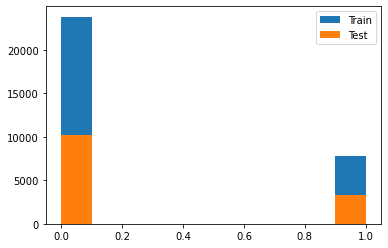

In [ ]:
plt.hist(y_train, label="Train")
plt.hist(y_test, label="Test")
plt.legend()
plt.show()

## KNN

In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier
# Paso 1
knn = KNeighborsClassifier(n_neighbors=3, random_state=11)#hiperparametros

# Paso 2
knn.fit(X_train, y_train)

# Paso 3
y_test_pred = knn.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.8121176383872633
CPU times: total: 1.16 s
Wall time: 1.15 s


## Regresión logística

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression

# Paso 1
regresion_logistica = LogisticRegression(random_state=11)

# Paso 2
regresion_logistica.fit(X,y)

# Paso 3
y_test_pred = regresion_logistica.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.8153608019458981
CPU times: total: 1.75 s
Wall time: 328 ms


C:\Users\Omar\anaconda3\envs\normal\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Random Forest

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
# Paso 1
model = RandomForestClassifier(random_state=11, n_jobs=6, max_features: 0.2, n_estimators: 2048)
# Paso 2
model.fit(X_train, y_train)
# Paso 3
y_test_pred = model.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.8459497309648412
CPU times: total: 2.69 s
Wall time: 625 ms


In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

print("Importancia de características:")

for f in range(X_train.shape[1]):
    print("Característica %s (%f)" % (df.columns[int(1+indices[f])], importances[indices[f]]))

Importancia de características:
Característica workclass (0.226440)
Característica fnlwgt (0.123168)
Característica educational-num (0.109252)
Característica race (0.102467)
Característica relationship (0.097103)
Característica capital-gain (0.085873)
Característica gender (0.082430)
Característica marital-status (0.049239)
Característica education (0.039599)
Característica occupation (0.036313)
Característica native-country (0.020023)
Característica capital-loss (0.016426)
Característica hours-per-week (0.011668)


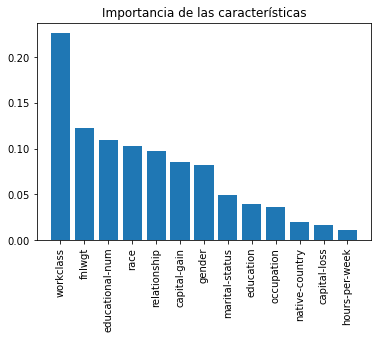

In [ ]:
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train.shape[1]), importances[indices],
       align="center")
xticks_labels = [df.columns[1+i] for i in indices]
plt.xticks(range(X.shape[1]), xticks_labels, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

## SVM

In [ ]:
%%time
from sklearn.svm import SVC
# Paso 1
modelo = SVC(C = 100, kernel = 'linear', random_state=123)
# Paso 2
modelo.fit(X_train, y_train)
# Paso 3
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.831945161052554
CPU times: total: 1min 50s
Wall time: 1min 50s


In [ ]:
%%time
# Paso 1
modelo = SVC(C = 100, kernel = 'poly', random_state=123)
# Paso 2
modelo.fit(X_train, y_train)
# Paso 3
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.8276700818161716
CPU times: total: 30 s
Wall time: 30.1 s


In [ ]:
%%time
# Paso 1
modelo = SVC(C = 100, kernel = 'rbf', random_state=123)
# Paso 2
modelo.fit(X_train, y_train)
# Paso 3
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.8200044224957618
CPU times: total: 42.4 s
Wall time: 42.6 s


In [ ]:
%%time
# Paso 1
modelo = SVC(C = 100, kernel = 'sigmoid', random_state=123)
# Paso 2
modelo.fit(X_train, y_train)
# Paso 3
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.744084911918626
CPU times: total: 26.3 s
Wall time: 26.4 s


## Gradiente potenciado basado en árboles

In [ ]:
from lightgbm import LGBMClassifier
# Paso 1
modelo = LGBMClassifier(random_state=123)
# Paso 2
modelo.fit(X_train, y_train)
# Paso 3
y_test_pred = modelo.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.8707157072307806


# HYPERPARAMETER TUNING

### GRID SEARCH CV - Busqueda de hiperparametros en grilla

In [ ]:
# Definir la grilla de los parametros, cada combinación es un modelo adicional
# Esto implica que entre más exahusiva sea la busqueda el tiempo de entrenamiento será mayor
param_grid = {'n_estimators': [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048],
              'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

In [ ]:
# Paso 1
clf = RandomForestClassifier()

# Paso NUEVO
from sklearn.model_selection import GridSearchCV
GS_RF = GridSearchCV(clf,
                     param_grid=param_grid,
                     cv=5,
                     n_jobs=4,
                     verbose=0)

In [ ]:
%%time
# Paso 2
GS_RF.fit(X_train, y_train)

CPU times: total: 34.1 s
Wall time: 24min 35s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                          0.8, 0.9, 1.0],
                         'n_estimators': [4, 8, 16, 32, 64, 128, 256, 512, 1024,
                                          2048]})

In [ ]:
GS_RF.best_params_

{'max_features': 0.2, 'n_estimators': 2048}

In [ ]:
clf_op = GS_RF.best_estimator_
y_test_pred = clf_op.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.8465393970664111


In [ ]:
resultados = pd.concat([pd.DataFrame(GS_RF.cv_results_['params']),
                        pd.DataFrame(GS_RF.cv_results_['mean_test_score'], columns=['mean_test_score'])], axis=1)
resultados

,max_features,n_estimators,mean_test_score
0,0.1,4,0.832286
1,0.1,8,0.839172
2,0.1,16,0.841700
3,0.1,32,0.842331
4,0.1,64,0.844732
...,...,...,...
95,1.0,128,0.842774
96,1.0,256,0.842868
97,1.0,512,0.842995
98,1.0,1024,0.842995


<AxesSubplot:xlabel='max_features', ylabel='n_estimators'>

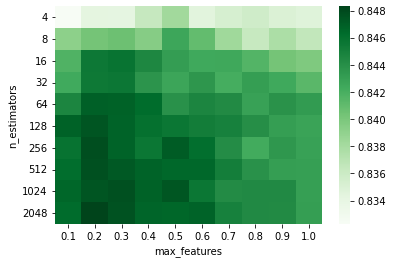

In [ ]:
import seaborn as sns
sns.heatmap(resultados.pivot('n_estimators', 'max_features', 'mean_test_score'), cmap='Greens')

## RANDOM SEARCH CV - Busqueda aleatoria de hiperparametros

In [ ]:
# Definir las distribuciones de los parametros para esto nos apoyamos scipy
from scipy.stats import uniform, randint

param_dist = {"n_estimators": randint(4, 2048),
              "max_features": uniform(0, 1)}

# y el número de iteraciones, dependiendo de esto se consume más tiempo

iteraciones = 50

In [ ]:
# Importar librerias
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
# Paso 1
clf = RandomForestClassifier()
# Paso NUEVO
RS_RF = RandomizedSearchCV(clf,
                           param_distributions =param_dist,
                           n_iter = iteraciones,
                           cv=5,
                           n_jobs=4,
                           verbose=0)

In [ ]:
%%time
RS_RF.fit(X_train, y_train)

CPU times: total: 14.1 s
Wall time: 5min 28s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000157148F5960>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000157148F5C30>})

In [ ]:
RS_RF.best_params_

{'max_features': 0.2813641082296572, 'n_estimators': 747}

In [ ]:
clf_op = RS_RF.best_estimator_

In [ ]:
y_test_pred = clf_op.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.8458023144394486


Para comprender mejor algunas diferencias haga este ejercicio y analice los resultados <br>
https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html?highlight=gridsearchcv%20randomizedsearch

In [ ]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
import numpy as np

from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier

# get some data
X, y = load_digits(return_X_y=True, n_class=3)

# build a classifier
clf = SGDClassifier(loss="hinge", penalty="elasticnet", fit_intercept=True)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results["rank_test_score"] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print(
                "Mean validation score: {0:.3f} (std: {1:.3f})".format(
                    results["mean_test_score"][candidate],
                    results["std_test_score"][candidate],
                )
            )
            print("Parameters: {0}".format(results["params"][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {
    "average": [True, False],
    "l1_ratio": stats.uniform(0, 1),
    "alpha": loguniform(1e-2, 1e0),
}

# run randomized search
n_iter_search = 15
random_search = RandomizedSearchCV(
    clf, param_distributions=param_dist, n_iter=n_iter_search
)

start = time()
random_search.fit(X, y)
print(
    "RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
    % ((time() - start), n_iter_search)
)
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {
    "average": [True, False],
    "l1_ratio": np.linspace(0, 1, num=10),
    "alpha": np.power(10, np.arange(-2, 1, dtype=float)),
}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X, y)

print(
    "GridSearchCV took %.2f seconds for %d candidate parameter settings."
    % (time() - start, len(grid_search.cv_results_["params"]))
)
report(grid_search.cv_results_)

RandomizedSearchCV took 0.88 seconds for 15 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.991 (std: 0.012)
Parameters: {'alpha': 0.0470950442615072, 'average': False, 'l1_ratio': 0.8529931145148744}

Model with rank: 2
Mean validation score: 0.987 (std: 0.007)
Parameters: {'alpha': 0.03130345536434546, 'average': False, 'l1_ratio': 0.13209144347169233}

Model with rank: 3
Mean validation score: 0.985 (std: 0.013)
Parameters: {'alpha': 0.2683240013986273, 'average': False, 'l1_ratio': 0.23721274988762886}

GridSearchCV took 2.85 seconds for 60 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.993 (std: 0.007)
Parameters: {'alpha': 0.1, 'average': False, 'l1_ratio': 0.0}

Model with rank: 2
Mean validation score: 0.989 (std: 0.015)
Parameters: {'alpha': 0.01, 'average': False, 'l1_ratio': 0.0}

Model with rank: 3
Mean validation score: 0.987 (std: 0.007)
Parameters: {'alpha': 0.01, 'average': False, 'l1_ratio': 0.3333333333333333}

Mod